In [ ]:
import mcmc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
#Time Calculations

def gen_hc(dim):
    mat = np.zeros((dim * 2, dim))
    for i in range(dim):
        mat[2 * i] = np.zeros(dim)
        mat[2 * i][i] = 1
        mat[2 * i + 1] = np.zeros(dim)
        mat[2 * i + 1][i] = -1
    vect = np.zeros(dim * 2)
    vect[::2] = 1
    return mat, vect

def ind_time_test(walk, dim, num_iter = 5, num_samples = 100, r = 0.4):
    avg_time = 0
    for i in range(num_iter):
        A,b = gen_hc(dim)
        start = time.time()
        res = mcmc.generate_walk(A, b, walk, r, num_samples)
        
        end = time.time()
        avg_time += (end - start)
    
    return avg_time / num_iter

def iter_time_test(df, walks = ["vaidya"], dims = [x for x in range(5, 55, 5)]):
    if df is None:
        columns = ["walk", "dim", "time"]
        df = pd.DataFrame(columns = columns)
    
    for walk in walks:
        for dim in dims:
            time = ind_time_test(walk, dim)
            df.loc[len(df)] = [walk, dim, time]
            print("Completed " + str(dim) + " " + walk)
    return df

In [3]:
df = iter_time_test(None, walks = ["ball", "hitrun", 'dikin', 'vaidya'])

Completed 5 ball
Completed 10 ball
Completed 15 ball
Completed 20 ball
Completed 25 ball
Completed 30 ball


IOStream.flush timed out


Completed 35 ball
Completed 40 ball


IOStream.flush timed out


Completed 45 ball


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


Completed 50 ball
Completed 5 hitrun
Completed 10 hitrun
Completed 15 hitrun
Completed 20 hitrun
Completed 25 hitrun
Completed 30 hitrun
Completed 35 hitrun
Completed 40 hitrun


IOStream.flush timed out


Completed 45 hitrun
Completed 50 hitrun
Completed 5 dikin
Completed 10 dikin
Completed 15 dikin
Completed 20 dikin
Completed 25 dikin
Completed 30 dikin
Completed 35 dikin
Completed 40 dikin
Completed 45 dikin
Completed 50 dikin
Completed 5 vaidya
Completed 10 vaidya
Completed 15 vaidya
Completed 20 vaidya
Completed 25 vaidya
Completed 30 vaidya
Completed 35 vaidya
Completed 40 vaidya
Completed 45 vaidya
Completed 50 vaidya


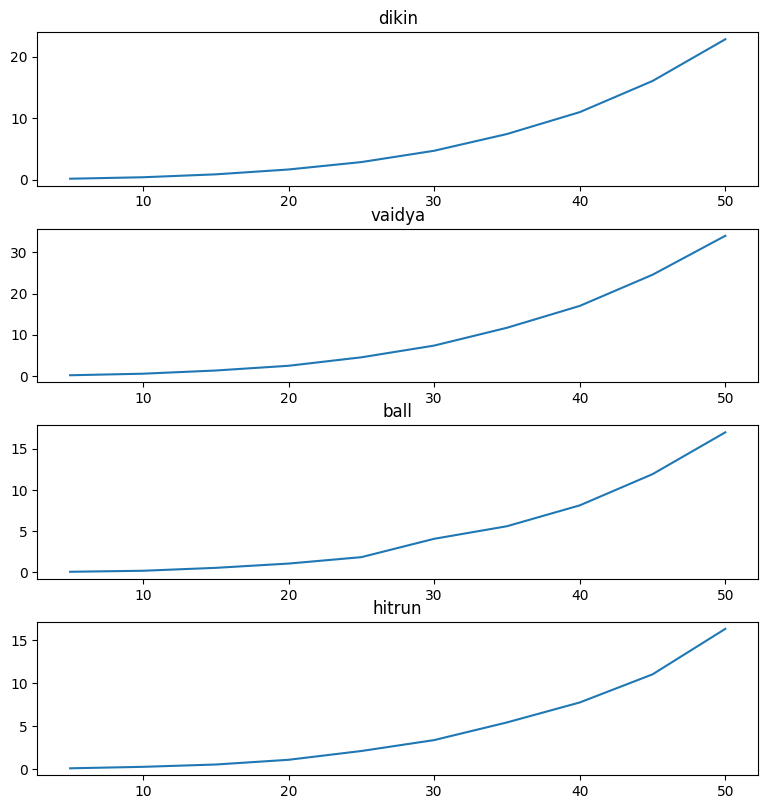

In [4]:
walk_list = ['dikin', 'vaidya', 'ball', 'hitrun']
plt.rcParams["figure.figsize"] = (8, 8)
fig,ax = plt.subplots(len(walk_list))
fig.tight_layout(pad = 1.0)

ind = 0
for walk in walk_list:
    subset = df[df.walk == walk]
    ax[ind].plot(subset.dim, subset.time, label = walk)
    ax[ind].set_title(walk)
    ind += 1
plt.show()

In [11]:
def mixing_time_analysis(dim, walk, num_samples, r = 0.4, thresh = 0.95):
    A, b = gen_hc(dim)
    res = mcmc.generate_walk(A, b, walk, r, num_samples)
    
    ind = -1
    for i in range(len(res)):
        if (res[i] > thresh).all():
            ind = i
            break
    return ind

def mixing_time_test(dims, walk_r, num_samples, thresh):
    columns = ['walk', 'dim', 'mix_time']
    df = pd.DataFrame(columns = columns)
    for walk in walk_r:
        for dim in dims:
            mix_time = mixing_time_analysis(dim, walk, num_samples, walk_r[walk], thresh)
            df.loc[len(df)] = [walk, dim, mix_time]
    return df

def mixing_time_test_iter(dims = [1,2,3,4,5], walk_r = {'dikin':1, 'vaidya':1, 'ball':0.3}, 
                          num_samples = 10000, thresh = 0.95, num_iter = 10):
    
    res = mixing_time_test(dims, walk_r, num_samples, thresh)
    
    res = res.rename(columns = {'mix_time':'1'})
    
    for i in range(num_iter - 1):
        res_sup = mixing_time_test(dims, walk_r, num_samples, thresh)
        res['mix'+str(i + 2)] = res_sup['mix_time']
    
    return res

In [16]:
res = mixing_time_test_iter(thresh = 0.8)

In [17]:
res

,walk,dim,1,mix2,mix3,mix4,mix5,mix6,mix7,mix8,mix9,mix10
0,dikin,1,49,5,30,8,17,16,154,87,23,202
1,dikin,2,52,235,103,531,856,120,81,83,191,495
2,dikin,3,943,741,279,219,238,169,3013,147,1675,616
3,dikin,4,2014,4626,2313,1325,3366,3422,2641,3958,-1,116
4,dikin,5,-1,3978,-1,4835,-1,-1,-1,-1,-1,9817
5,vaidya,1,57,115,20,22,7,16,5,9,1,54
6,vaidya,2,268,260,188,130,169,16,56,99,161,17
7,vaidya,3,1653,110,2988,2263,515,52,591,2064,4557,882
8,vaidya,4,3596,4801,-1,3440,633,6326,9693,8388,2934,4887
9,vaidya,5,-1,3527,-1,-1,5096,-1,-1,3710,-1,-1


In [7]:
def generate_square(n = 1):
    A_prop = np.array([[1, 0], [-1, 0],[0,1], [0,-1]])
    b_prop = np.array([[1], [0], [1], [0]])
    
    A = A_prop
    b = b_prop
    for i in range(n - 1):
        A = np.vstack((A, A_prop))
        b = np.vstack((b, b_prop))
    
    return A, b


def constraint_ind_test(walk, n, r = 0.4, num_samples = 10000, thresh = 0.9):
    A, b = generate_square(n)
    res = mcmc.generate_walk(A, b, walk, r, num_samples)
    ind = -1
    for i in range(len(res)):
        if (res[i] > thresh).all():
            ind = i
            break
    return ind

def constraint_ovr_test(walks = ['dikin', 'vaidya'], ns = [i for i in range(1, 11)], r = 0.4, num_samples = 10000, thresh = 0.9):
    columns = ['walk', 'n', 'hit']
    df = pd.DataFrame(columns = columns)
    for walk in walks:
        for n in ns:
            res = constraint_ind_test(walk, n, r, num_samples, thresh)
            df.loc[len(df)] = [walk, n, res]
    return df


def constraint_ovr_test_iter(walks = ['dikin', 'vaidya'], ns = [i for i in range(1, 11)], 
                             r = 0.4, num_samples = 10000, thresh = 0.9, num_iter = 10):
    
    res = constraint_ovr_test(walks, ns, r, num_samples, thresh)
    
    res = res.rename(columns = {'hit':'hit1'})
    
    for i in range(num_iter - 1):
        res_sup = constraint_ovr_test(walks, ns, r, num_samples, thresh)
        res['hit'+str(i + 2)] = res_sup['hit']
    
    return res

In [8]:
res2 = constraint_ovr_test_iter()

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


In [18]:
res2

,walk,n,hit1,hit2,hit3,hit4,hit5,hit6,hit7,hit8,hit9,hit10
0,dikin,1,1035,4459,4391,-1,-1,-1,452,4564,3355,3429
1,dikin,2,3723,239,2698,5650,2131,7398,2451,-1,3890,-1
2,dikin,3,-1,4791,882,-1,-1,4918,-1,2782,-1,-1
3,dikin,4,9217,-1,-1,-1,6766,-1,4920,-1,3222,914
4,dikin,5,-1,5936,-1,-1,-1,-1,-1,-1,-1,-1
5,dikin,6,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6,dikin,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7,dikin,8,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
8,dikin,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9,dikin,10,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


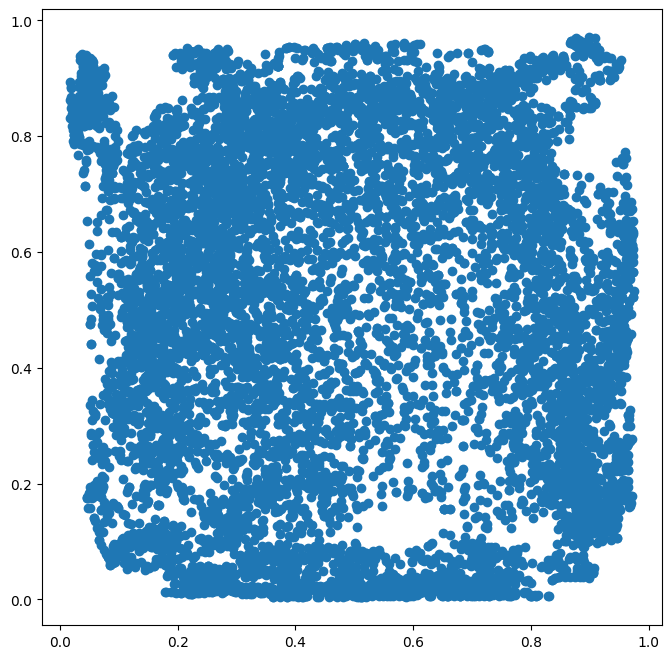

In [40]:
A, b = generate_square(10)
res = mcmc.generate_walk(A, b, "vaidya", 0.3, 10000)

fig = plt.figure()
#ax = fig.add_subplot(projection='3d')
plt.scatter(res[:, 0], res[:, 1])
plt.show()